In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

#sc.settings.set_figure_params(dpi=80)
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sc.set_figure_params(scanpy=True, fontsize=14 )
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']

In [ ]:
import loompy as lp
import pandas as pd

In [ ]:
lf = lp.connect("RPE_mel_pyscenic_output.loom",  validate=False , mode='r+')

In [ ]:
lf

In [ ]:
lf.ca.CellID

array(['ACATCCCGTTGACTAC-1', 'AGGATCTAGTGTTCAC-1', 'CACATGAAGTCTAACC-1',
       ..., 'TTTCACAGTAGGCTCC-1-3', 'TTTCAGTCATAGGTAA-1-3',
       'TTTCAGTTCGTTGTAG-1-3'], dtype=object)

In [ ]:
lf.ca.RegulonsAUC

array([(0.       , 0.01990204, 0.02547601, 0.01541747, 0.05823927, 0.02999669, 0.        , 0.1616396 , 0.01891426, 0.03234604, 0., 0.02457287, 0., 0.0426338 , 0.06805878, 0., 0., 0.02334817, 0.08209369, 0.06651199, 0.        , 0.02723165, 0.00524503, 0.01394403, 0.        , 0.0084178 , 0.11001765, 0.        , 0.01622993, 0., 0.       , 0.        , 0.        , 0.06187241, 0.00703965, 0.15719258, 0.00615954, 0.00804331, 0.04537252, 0.        , 0.        , 0.        , 0.06756512, 0.        , 0., 0.01885197, 0.03548956, 0.03676373, 0.05895579, 0.04706122, 0.02846094, 0.02990407, 0.00907722, 0.12815159, 0., 0.03818035, 0.03739412, 0.05864459, 0., 0.0068267 , 0., 0.01186884, 0.01621655, 0.00946823, 0.02081136, 0.00336389, 0.01737628, 0., 0.       , 0.        , 0.05724955, 0.00737644, 0.02820315, 0.00300259, 0.03818047, 0.07545453, 0.04620484, 0.00211116, 0.00673602, 0., 0.02955234, 0.01338042, 0.02912725, 0.01301882, 0.01009097, 0.01784658, 0.        , 0.24954885, 0.08578242, 0.        , 0.0

In [ ]:
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)

In [ ]:
auc_mtx

,Alx3(+),Ar(+),Arid3a(+),Arid5b(+),Arnt2(+),Arntl(+),Ascl1(+),Atf2(+),Atf3(+),Atf4(+),...,Zfp943(+),Zfp961(+),Zfp984(+),Zfx(+),Zkscan1(+),Zkscan5(+),Zkscan7(+),Zscan2(+),Zscan26(+),Zxdb(+)
ACATCCCGTTGACTAC-1,0.000000,0.019902,0.025476,0.015417,0.058239,0.029997,0.000000,0.161640,0.018914,0.032346,...,0.0,0.000000,0.043471,0.043682,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
AGGATCTAGTGTTCAC-1,0.000000,0.000000,0.006003,0.007263,0.026890,0.000000,0.012642,0.000000,0.015712,0.041989,...,0.0,0.001643,0.080755,0.033793,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
CACATGAAGTCTAACC-1,0.000000,0.039624,0.035650,0.029355,0.070052,0.021103,0.017401,0.223047,0.038710,0.031477,...,0.0,0.018787,0.103538,0.067309,0.000000,0.000000,0.000000,0.000000,0.023202,0.0
CATTGCCCAGCGTATT-1,0.000000,0.000000,0.018092,0.022647,0.040583,0.000000,0.021149,0.039753,0.020000,0.028468,...,0.0,0.014437,0.029550,0.048407,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
CTTCTCTAGGCACCAA-1,0.016136,0.002346,0.011371,0.071915,0.120220,0.010165,0.029181,0.251508,0.042103,0.022046,...,0.0,0.036027,0.190674,0.102664,0.000000,0.000000,0.000000,0.103635,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTCCGATCG-1-3,0.000914,0.024826,0.026885,0.036512,0.058305,0.043807,0.000000,0.169219,0.014722,0.037833,...,0.0,0.013728,0.066834,0.040515,0.017848,0.000000,0.000000,0.000000,0.000000,0.0
TTGTTTGGTAGCCAGA-1-3,0.007347,0.001366,0.005138,0.022905,0.047135,0.000000,0.000000,0.100541,0.000000,0.047791,...,0.0,0.043955,0.020269,0.050911,0.000000,0.000000,0.000000,0.000000,0.113247,0.0
TTTCACAGTAGGCTCC-1-3,0.000000,0.032379,0.000000,0.038518,0.071792,0.013258,0.000000,0.156226,0.000000,0.031289,...,0.0,0.035963,0.000000,0.064459,0.000000,0.000000,0.000000,0.053364,0.069385,0.0
TTTCAGTCATAGGTAA-1-3,0.000000,0.025935,0.000985,0.012212,0.026928,0.000000,0.010679,0.043310,0.002157,0.042135,...,0.0,0.000000,0.066158,0.031410,0.019097,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)
regulons = lf.ra.Regulons

In [ ]:
auc_mtx

,Alx3(+),Ar(+),Arid3a(+),Arid5b(+),Arnt2(+),Arntl(+),Ascl1(+),Atf2(+),Atf3(+),Atf4(+),...,Zfp943(+),Zfp961(+),Zfp984(+),Zfx(+),Zkscan1(+),Zkscan5(+),Zkscan7(+),Zscan2(+),Zscan26(+),Zxdb(+)
ACATCCCGTTGACTAC-1,0.000000,0.019902,0.025476,0.015417,0.058239,0.029997,0.000000,0.161640,0.018914,0.032346,...,0.0,0.000000,0.043471,0.043682,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
AGGATCTAGTGTTCAC-1,0.000000,0.000000,0.006003,0.007263,0.026890,0.000000,0.012642,0.000000,0.015712,0.041989,...,0.0,0.001643,0.080755,0.033793,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
CACATGAAGTCTAACC-1,0.000000,0.039624,0.035650,0.029355,0.070052,0.021103,0.017401,0.223047,0.038710,0.031477,...,0.0,0.018787,0.103538,0.067309,0.000000,0.000000,0.000000,0.000000,0.023202,0.0
CATTGCCCAGCGTATT-1,0.000000,0.000000,0.018092,0.022647,0.040583,0.000000,0.021149,0.039753,0.020000,0.028468,...,0.0,0.014437,0.029550,0.048407,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
CTTCTCTAGGCACCAA-1,0.016136,0.002346,0.011371,0.071915,0.120220,0.010165,0.029181,0.251508,0.042103,0.022046,...,0.0,0.036027,0.190674,0.102664,0.000000,0.000000,0.000000,0.103635,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTCCGATCG-1-3,0.000914,0.024826,0.026885,0.036512,0.058305,0.043807,0.000000,0.169219,0.014722,0.037833,...,0.0,0.013728,0.066834,0.040515,0.017848,0.000000,0.000000,0.000000,0.000000,0.0
TTGTTTGGTAGCCAGA-1-3,0.007347,0.001366,0.005138,0.022905,0.047135,0.000000,0.000000,0.100541,0.000000,0.047791,...,0.0,0.043955,0.020269,0.050911,0.000000,0.000000,0.000000,0.000000,0.113247,0.0
TTTCACAGTAGGCTCC-1-3,0.000000,0.032379,0.000000,0.038518,0.071792,0.013258,0.000000,0.156226,0.000000,0.031289,...,0.0,0.035963,0.000000,0.064459,0.000000,0.000000,0.000000,0.053364,0.069385,0.0
TTTCAGTCATAGGTAA-1-3,0.000000,0.025935,0.000985,0.012212,0.026928,0.000000,0.010679,0.043310,0.002157,0.042135,...,0.0,0.000000,0.066158,0.031410,0.019097,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
res=pd.concat([pd.Series(r.tolist(),index=regulons.dtype.names) for r in regulons],axis=1)

In [ ]:
res.to_csv("epcam_placods_7_16_06.csv")


In [ ]:
res

,0,1,2,3,4,5,6,7,8,9,...,25855,25856,25857,25858,25859,25860,25861,25862,25863,25864
Alx3(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ar(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arid3a(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arid5b(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arnt2(+),0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zkscan5(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zkscan7(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zscan2(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zscan26(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
adata_genes=sc.read_h5ad('/home/julia/data/placodes/ANDYs_notebboks/Placodes_tragectory/otic_TF_UMAP.h5ad')
#adata=sc.read_h5ad('/home/julia/data/placodes/ANDYs_notebboks/h5ad/scenic_e8_e9_umap_reg.h5ad')
#sc.pl.umap(adata_genes,color=["leiden", 'Smad9'], legend_loc='on data', size=100, color_map='magma')

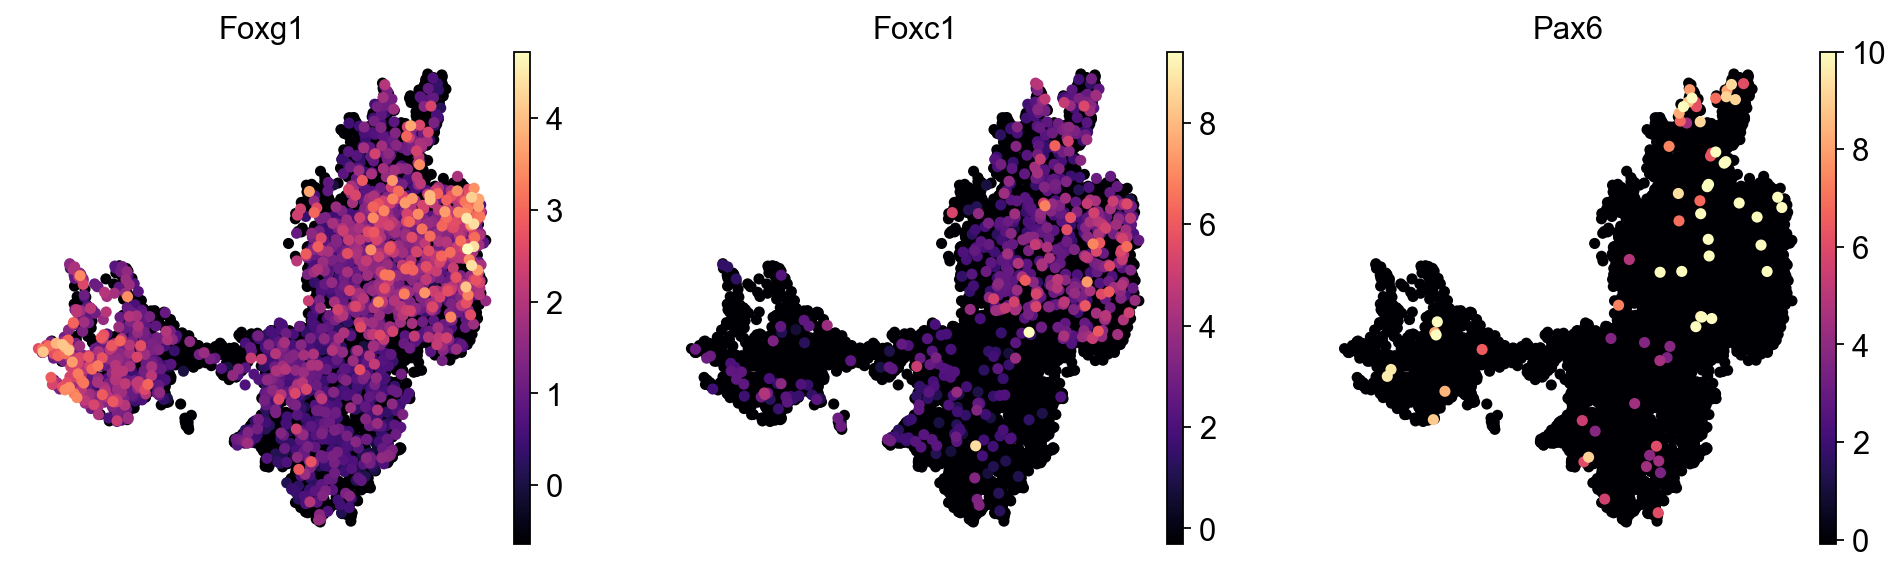

In [ ]:
sc.pl.umap(adata_genes,color=['Foxg1', 'Foxc1', 'Pax6'], legend_loc='on data', size=100, color_map='magma', frameon=False)

In [ ]:
adata_genes

AnnData object with n_obs × n_vars = 6028 × 1729
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cluster_annotations_colors', 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
auc_mtx

,Alx3(+),Ar(+),Arid3a(+),Arid5b(+),Arnt2(+),Arntl(+),Ascl1(+),Atf2(+),Atf3(+),Atf4(+),...,Zfp943(+),Zfp961(+),Zfp984(+),Zfx(+),Zkscan1(+),Zkscan5(+),Zkscan7(+),Zscan2(+),Zscan26(+),Zxdb(+)
ACATCCCGTTGACTAC-1,0.000000,0.019902,0.025476,0.015417,0.058239,0.029997,0.000000,0.161640,0.018914,0.032346,...,0.0,0.000000,0.043471,0.043682,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
AGGATCTAGTGTTCAC-1,0.000000,0.000000,0.006003,0.007263,0.026890,0.000000,0.012642,0.000000,0.015712,0.041989,...,0.0,0.001643,0.080755,0.033793,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
CACATGAAGTCTAACC-1,0.000000,0.039624,0.035650,0.029355,0.070052,0.021103,0.017401,0.223047,0.038710,0.031477,...,0.0,0.018787,0.103538,0.067309,0.000000,0.000000,0.000000,0.000000,0.023202,0.0
CATTGCCCAGCGTATT-1,0.000000,0.000000,0.018092,0.022647,0.040583,0.000000,0.021149,0.039753,0.020000,0.028468,...,0.0,0.014437,0.029550,0.048407,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
CTTCTCTAGGCACCAA-1,0.016136,0.002346,0.011371,0.071915,0.120220,0.010165,0.029181,0.251508,0.042103,0.022046,...,0.0,0.036027,0.190674,0.102664,0.000000,0.000000,0.000000,0.103635,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTCCGATCG-1-3,0.000914,0.024826,0.026885,0.036512,0.058305,0.043807,0.000000,0.169219,0.014722,0.037833,...,0.0,0.013728,0.066834,0.040515,0.017848,0.000000,0.000000,0.000000,0.000000,0.0
TTGTTTGGTAGCCAGA-1-3,0.007347,0.001366,0.005138,0.022905,0.047135,0.000000,0.000000,0.100541,0.000000,0.047791,...,0.0,0.043955,0.020269,0.050911,0.000000,0.000000,0.000000,0.000000,0.113247,0.0
TTTCACAGTAGGCTCC-1-3,0.000000,0.032379,0.000000,0.038518,0.071792,0.013258,0.000000,0.156226,0.000000,0.031289,...,0.0,0.035963,0.000000,0.064459,0.000000,0.000000,0.000000,0.053364,0.069385,0.0
TTTCAGTCATAGGTAA-1-3,0.000000,0.025935,0.000985,0.012212,0.026928,0.000000,0.010679,0.043310,0.002157,0.042135,...,0.0,0.000000,0.066158,0.031410,0.019097,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
adata=sc.AnnData(auc_mtx,
           obs=adata_genes.obs,uns=adata_genes.uns,obsm=adata_genes.obsm)

/tmp/ipykernel_4095/4019417087.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=sc.AnnData(auc_mtx,


In [ ]:
adata

AnnData object with n_obs × n_vars = 6028 × 431
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'cluster_annotations'
    uns: 'cluster_annotations_colors', 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'

In [ ]:
import scFates as scf

In [ ]:
scf.tl.curve(adata,Nodes=55, use_rep="X_umap",

            epg_lambda=0.01, epg_mu=50)

inferring a principal curve --> parameters used 
    55 principal points, mu = 50, lambda = 0.01
    finished (0:00:12) --> added 
    .uns['epg'] dictionnary containing inferred elastic curve generated from elpigraph.
    .obsm['X_R'] hard assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'], coordinates of principal points in representation space.


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


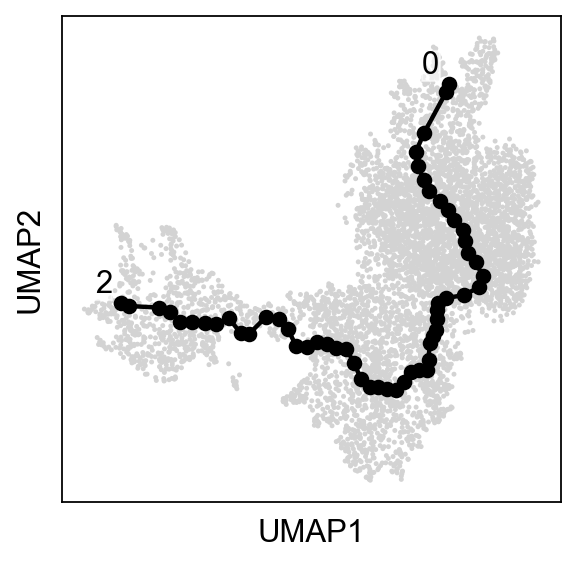

In [ ]:
scf.pl.graph(adata,basis="umap")

In [ ]:
scf.tl.root(adata,0)

node 0 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [ ]:
scf.tl.pseudotime(adata,n_jobs=20)

projecting cells onto the principal graph
    finished (0:00:00) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


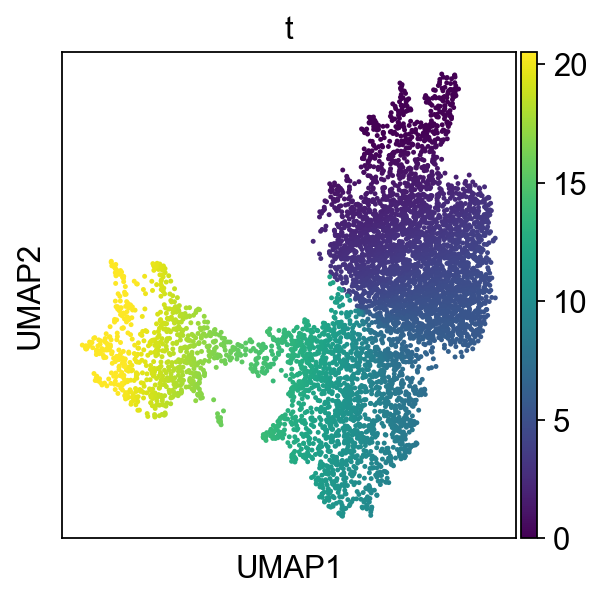

In [ ]:
sc.pl.umap(adata,color="t")

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


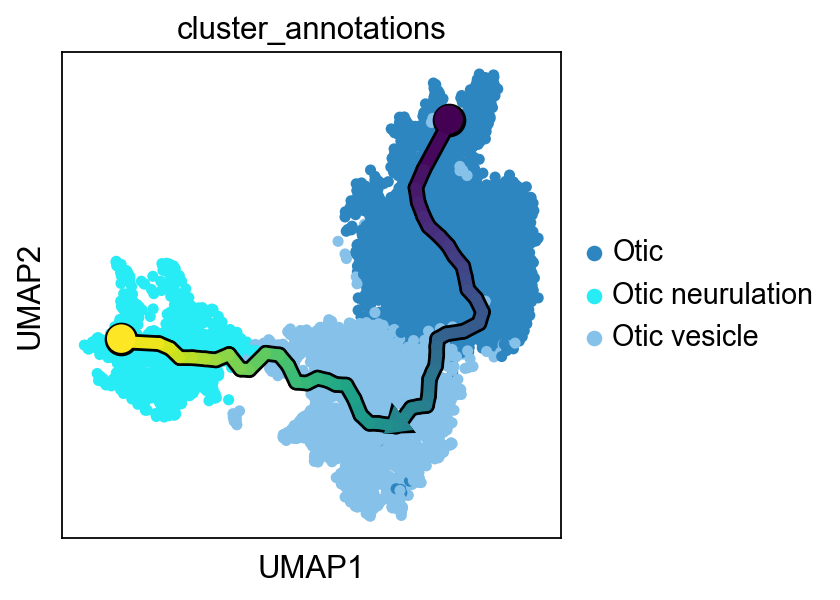

In [ ]:
scf.pl.trajectory(adata,basis="umap",arrows=True,arrow_offset=1,  color_cells='cluster_annotations', size=100, save='otic_tr_21_08.svg')

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


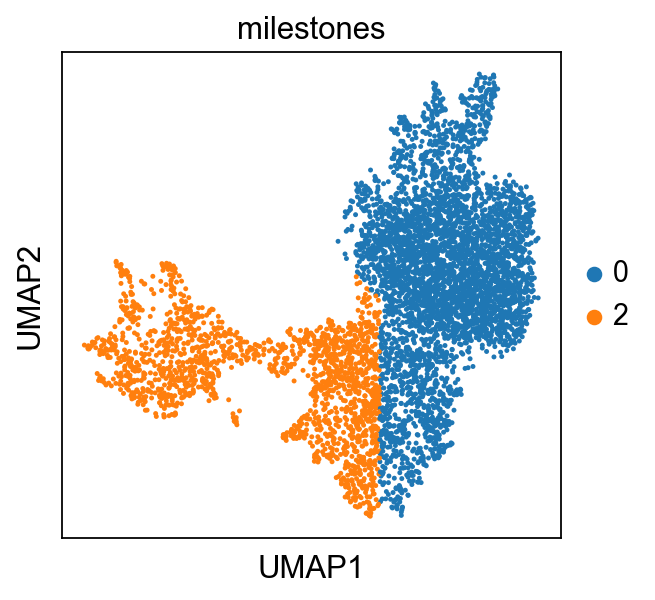

In [ ]:
sc.pl.umap(adata,color="milestones")

Estimation of deviation from linearity
    cells on the bridge: 100%|██████████| 3616/3616 [00:03<00:00, 992.13it/s]


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


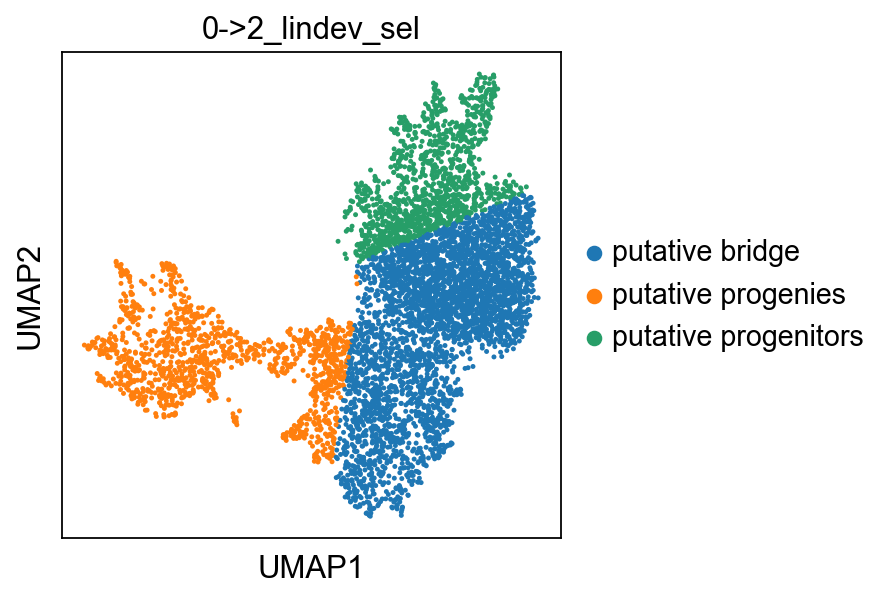

    finished (0:00:04) --> added 
    .var['0->2_rss'], pearson residuals of the linear fit.
    .obs['0->2_lindev_sel'], cell selections used for the test.


In [ ]:
scf.tl.linearity_deviation(adata,
                           start_milestone='0',
                           end_milestone='2',
                      n_jobs=20,
                           plot=True,basis="umap")

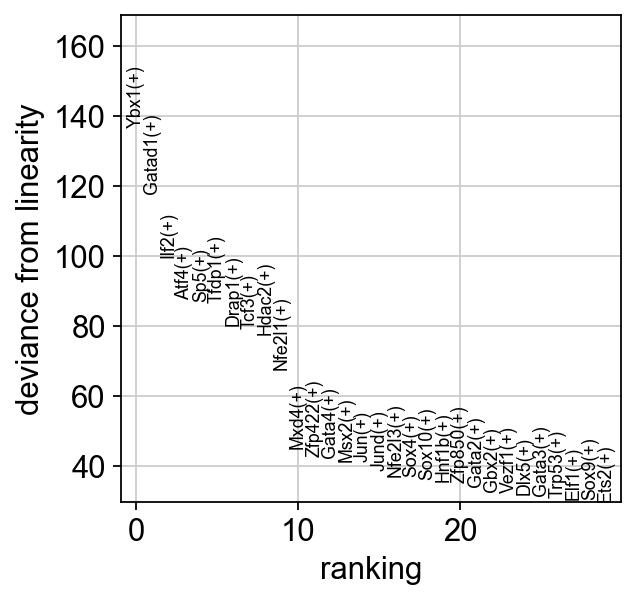

In [ ]:
scf.pl.linearity_deviation(adata,
                           start_milestone="0",
                           end_milestone="2")

In [ ]:
def beautiful_cmap(initial_cmap="Reds", grey_intensity=0.2, color_intencity=0.1):

    from matplotlib import cm
    from matplotlib.colors import ListedColormap
    import numpy as np

    cm_color = cm.get_cmap(initial_cmap, 128)
    cm_grey = cm.get_cmap("Greys", 128)

    c = ListedColormap(
        np.vstack(
            (cm_grey(np.linspace(0.2, 0.2, 1)),
             cm_color(np.linspace(0.1, 1, 128)))
    ))

    return c

reds_cmap = beautiful_cmap()
blues_cmap = beautiful_cmap("Blues")
rb_cmap = beautiful_cmap("RdBu_r")


In [ ]:
scf.tl.test_association(adata,n_jobs=20)

test features for association with the trajectory
    single mapping :  11%|█         | 46/431 [00:02<00:17, 21.65it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  13%|█▎        | 55/431 [00:02<00:16, 22.33it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  17%|█▋        | 72/431 [00:03<00:15, 23.75it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  21%|██        | 89/431 [00:03<00:14, 24.25it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  30%|██▉       | 129/431 [00:05<00:12, 25.17it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  33%|███▎      | 143/431 [00:05<00:11, 25.54it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  36%|███▌      | 156/431 [00:06<00:10, 25.24it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  38%|███▊      | 164/431 [00:06<00:10, 25.56it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  44%|████▎     | 188/431 [00:07<00:09, 26.05it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  45%|████▍     | 192/431 [00:07<00:09, 25.55it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  50%|█████     | 217/431 [00:08<00:08, 26.15it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  51%|█████     | 219/431 [00:08<00:08, 25.88it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  56%|█████▌    | 242/431 [00:09<00:07, 26.38it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  62%|██████▏   | 266/431 [00:10<00:06, 26.52it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  74%|███████▍  | 319/431 [00:11<00:04, 26.70it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  78%|███████▊  | 338/431 [00:12<00:03, 26.91it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  81%|████████▏ | 351/431 [00:12<00:02, 27.09it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  83%|████████▎ | 357/431 [00:13<00:02, 27.01it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  89%|████████▉ | 383/431 [00:14<00:01, 27.21it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping : 100%|██████████| 431/431 [00:15<00:00, 27.36it/s]
    found 0 significant features (0:00:15) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [ ]:
adata1=adata.copy()

reapplied filters, 264 significant features


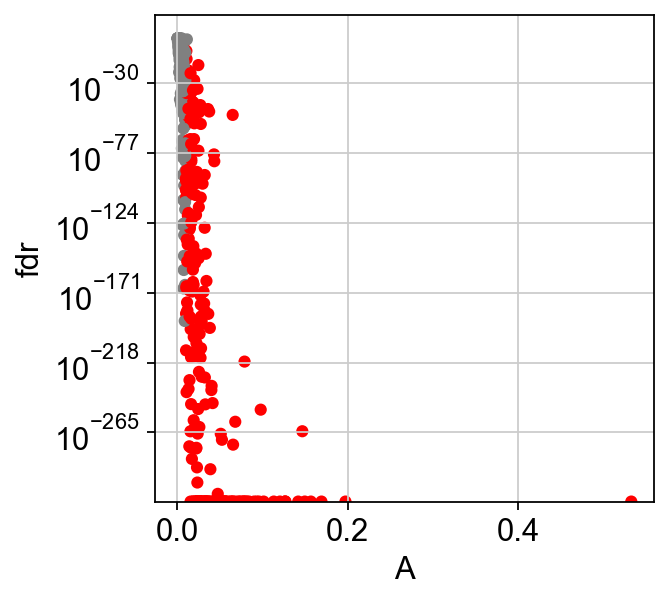

In [ ]:
scf.tl.test_association(adata1,reapply_filters=True,A_cut=.01)
scf.pl.test_association(adata1)

In [ ]:
scf.tl.fit(adata1,n_jobs=20)

fit features associated with the trajectory
    single mapping :   0%|          | 0/264 [00:00<?, ?it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  16%|█▋        | 43/264 [00:03<00:16, 13.29it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  19%|█▊        | 49/264 [00:03<00:15, 13.47it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  49%|████▉     | 130/264 [00:08<00:08, 15.68it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  58%|█████▊    | 154/264 [00:09<00:06, 15.74it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  69%|██████▊   | 181/264 [00:11<00:05, 15.99it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  70%|███████   | 185/264 [00:11<00:04, 15.92it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  71%|███████   | 188/264 [00:11<00:04, 15.91it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  73%|███████▎  | 194/264 [00:12<00:04, 16.01it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping : 100%|██████████| 264/264 [00:16<00:00, 16.50it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:16) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [ ]:
scf.tl.cluster(adata1,n_neighbors=60,metric="correlation", resolution=0.4)

Clustering features using fitted layer
computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
running Leiden clustering
    finished: found 2 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
    finished (0:00:04) --> added 
    .var['cluters'] identified modules.


In [ ]:
adata1.var.cluters.unique()

['0', '1']
Categories (2, object): ['0', '1']

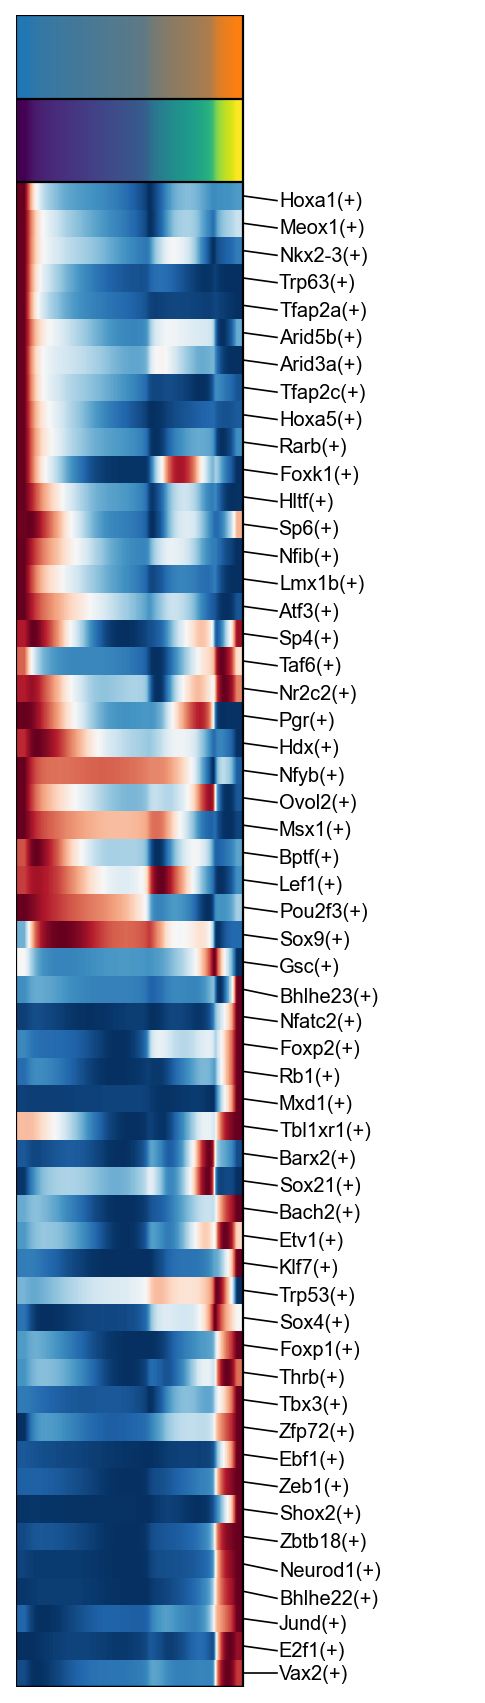

In [ ]:
# Your curated gene list
gene_list=[
"Hoxc6(+)", "Hoxa1(+)", "Meox1(+)", "Nkx2-3(+)", "Trp63(+)",
"Tfap2a(+)", "Arid5b(+)", "Arid3a(+)", "Tfap2c(+)", "Hoxa5(+)",
"Rarb(+)", "Foxk1(+)", "Hltf(+)", "Sp6(+)", "Nfib(+)",
"Lmx1b(+)", "Nfx1(+)", "Atf3(+)", "Sp4(+)", "Taf6(+)",
"Nr2c2(+)", "Pgr(+)", "Hdx(+)", "Nfyb(+)", "Ovol2(+)",
"Msx1(+)", "Bptf(+)", "Lef1(+)", "Pou2f3(+)","Sox9(+)", "Gsc(+)",
"Bhlhe23(+)", "Nfatc2(+)", "Foxp2(+)", "Rb1(+)", "Mxd1(+)",
"Tbl1xr1(+)","Lmx1a(+)", "Barx2(+)", "Sox21(+)", "Bach2(+)",
"Etv1(+)", "Klf7(+)", "Trp53(+)", "Sox4(+)", "Foxp1(+)",
"Thrb(+)", "Tbx3(+)", "Foxq1(+)", "Zfp72(+)", "Ebf1(+)",
"Zeb1(+)", "Shox2(+)", "Zbtb18(+)", "Neurod1(+)", "Bhlhe22(+)",
"Jund(+)", "E2f1(+)", "Vax2(+)"]



# Filter genes to keep only those present in adata
valid_genes = [g for g in gene_list if g in adata1.var_names]

# Set figure height dynamically (no empty space)
fig_height = len(valid_genes) * 0.25

g = scf.pl.trends(
    adata1,
    features=valid_genes,   # directly use your list
    basis="umap",
    annot="milestones",
    plot_emb=False,
    heatmap_space=0.0,
    figsize=(4, fig_height),
    ordering=None,
    return_genes=False,
    n_features=len(valid_genes)   # match exactly the list length
)
plt.savefig("figures/regulons_otic_1.svg")